<a href="https://colab.research.google.com/github/mishba-ai/Learning-ML/blob/main/digit_recognition_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

#load MNIST using sklearn fetch openML


In [ ]:
"""
    Load the MNIST dataset using sklearn's fetch_openml.

    Returns:
    - X: Feature matrix (pixel values)
    - y: Target labels (digit classes)
"""
mnist = fetch_openml('mnist_784',version=1,as_frame=False)
#as_frame=False tells the function to return the data as a NumPy array instead of a Pandas DataFrame.
X = mnist.data/255.0 #normalize the pixel value to [0,1]
Y = mnist.target.astype(int) #the target labels


# Data Exploration


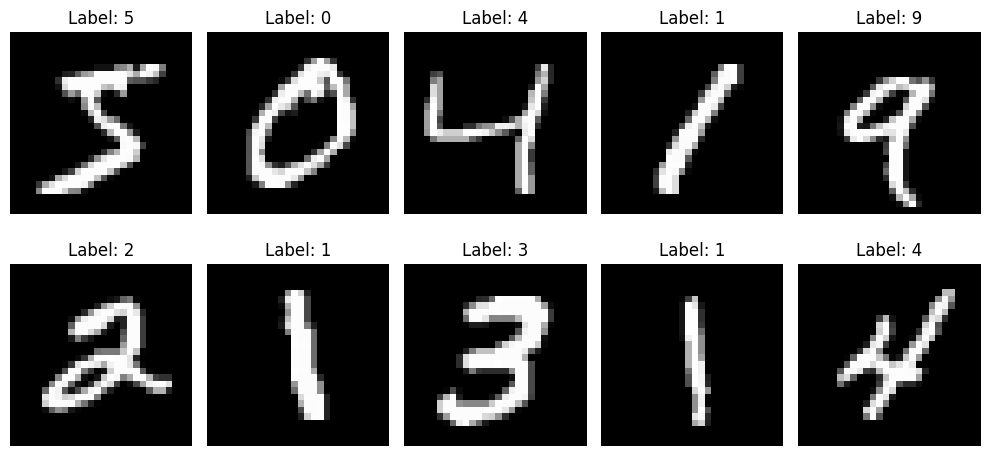

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {Y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing
 Split data into training and testing sets and scale features.
    
    Args:
    - X: Feature matrix
    - y: Target labels
    
    Returns:
    - X_train, X_test, y_train, y_test after preprocessing

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
        X,Y,test_size=0.2 , random_state=42
        )



In [ ]:
#scale the feature
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Train logistic regression model
 Train logistic regression model with multi-class strategy.
    
    Args:
    - X_train: Scaled training features
    - y_train: Training labels
    
    Returns:
    - Trained logistic regression model
    

     Use multinomial strategy for multi-class classification multinomial refers to a strategy for handling classification problems where you have more than two classes (multi-class classification).

In [ ]:

lr = LogisticRegression(
       multi_class='multinomial', # This sets the model to handle multiple classes directly.
       solver='lbfgs', # method to fine-tune the model's internal settings so it can make accurate predictions.
       max_iter=1000
   )
lr.fit(X_train,y_train)
    # The .fit() method adjusts the model's internal parameters to learn the relationships
    #between the features and the target labels.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

# Evaluate the model
Evaluate model performance and generate visualizations.
    
    Args:
    - model: Trained logistic regression model
    - X_test: Scaled test features
    - y_test: Test labels

In [ ]:
# make predictions on the test
y_pred = lr.predict(X_test)


In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.04%


In [ ]:
# detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

"""
precision:High precision means that when the model predicts a specific digit (e.g., '5'), it is very likely to be correct. In other words, out of all the images the model classified as '5', a high percentage are actually '5's.
recall: High recall means that for a specific digit (e.g., '5'), the model correctly identifies a large proportion of actual '5's in the dataset. In other words, out of all the true '5's, the model is able to find and classify most of them.
"""


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



"\nprecision:High precision means that when the model predicts a specific digit (e.g., '5'), it is very likely to be correct. In other words, out of all the images the model classified as '5', a high percentage are actually '5's.\nrecall: High recall means that for a specific digit (e.g., '5'), the model correctly identifies a large proportion of actual '5's in the dataset. In other words, out of all the true '5's, the model is able to find and classify most of them.\n"

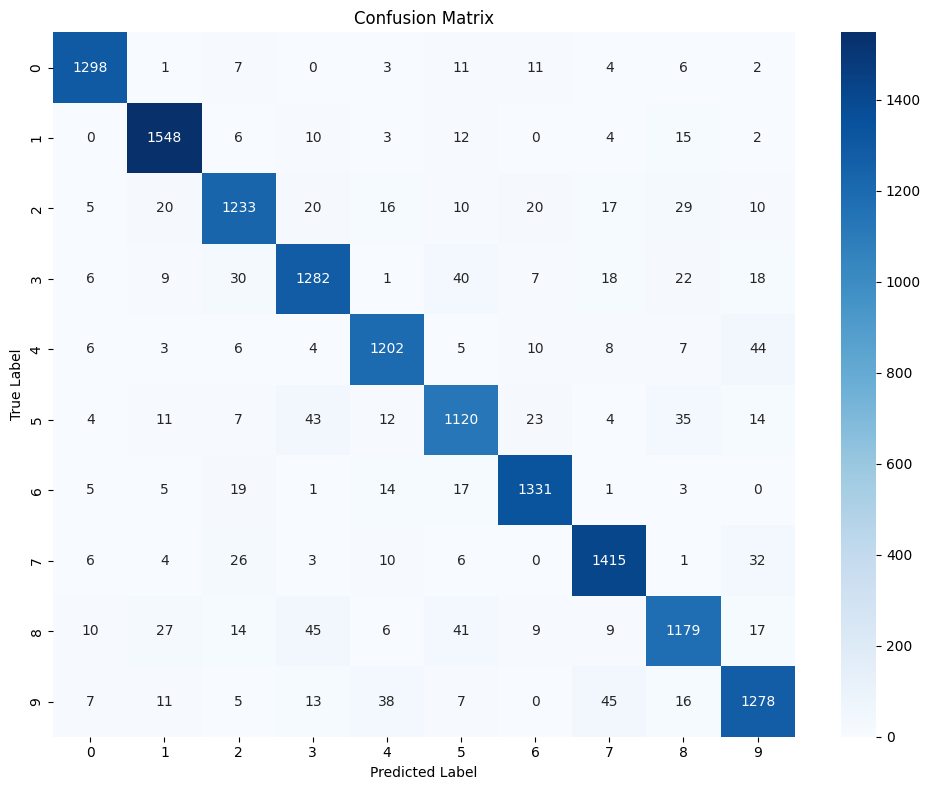

In [ ]:
 #confusion matrix is a table that is used to define the performance of a classification algorithm.
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#   Prediction Visualization


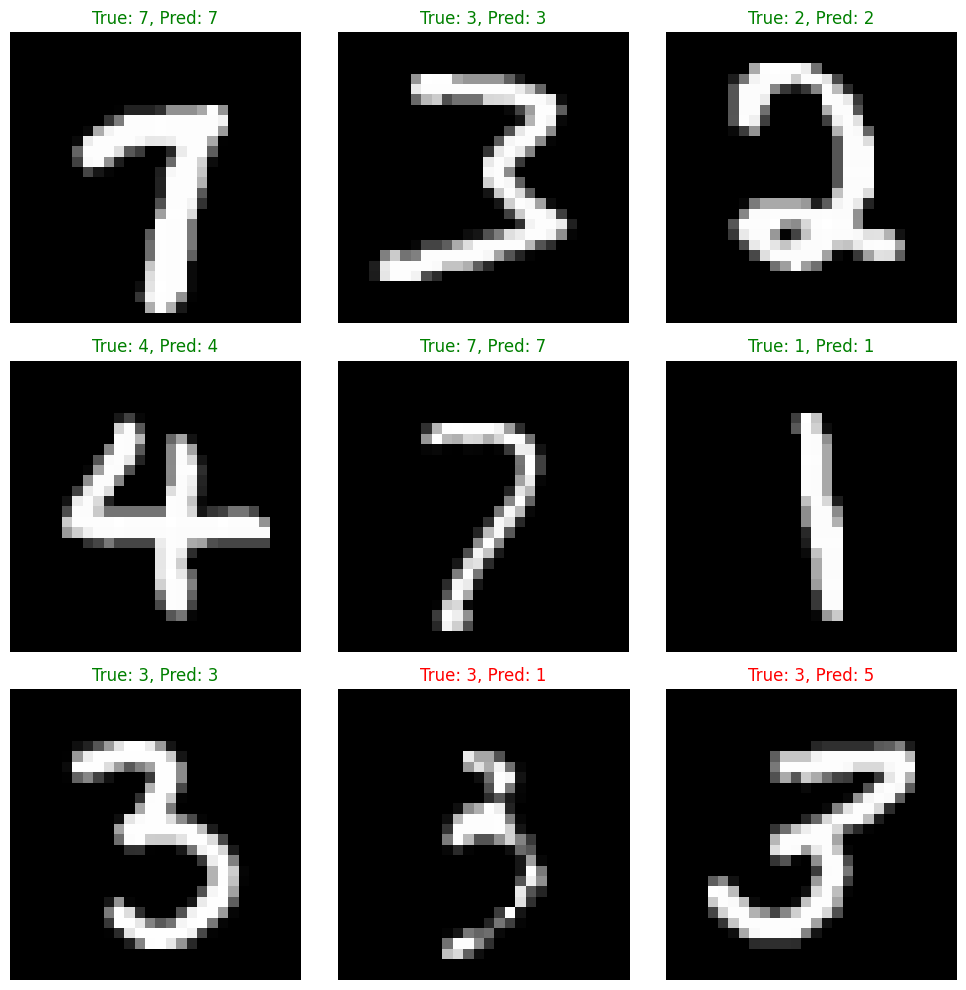

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    # Select a random index
    idx = np.random.randint(len(X_test))

    # Reshape and display the digit
    plt.subplot(3, 3, i+1)
    digit = X_test[idx].reshape(28, 28)
    plt.imshow(digit, cmap='gray')

    # Set title with true and predicted labels
    pred = lr.predict(X_test_scaled[idx].reshape(1, -1))[0]
    title_color = 'green' if pred == y_test[idx] else 'red'
    plt.title(f'True: {y_test[idx]}, Pred: {pred}', color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Prediction Probabilities




In [ ]:
# Select a few test samples
sample_indices = np.random.randint(0, len(X_test), 5)

In [ ]:
# Get prediction probabilities
sample_probs = lr.predict_proba(X_test_scaled[sample_indices])

Class 2: 100.00%
Class 3: 0.00%
Class 6: 0.00%


Class 0: 100.00%
Class 6: 0.00%
Class 2: 0.00%


Class 9: 99.96%
Class 7: 0.04%
Class 4: 0.00%


Class 5: 100.00%
Class 4: 0.00%
Class 8: 0.00%


Class 3: 100.00%
Class 2: 0.00%
Class 0: 0.00%




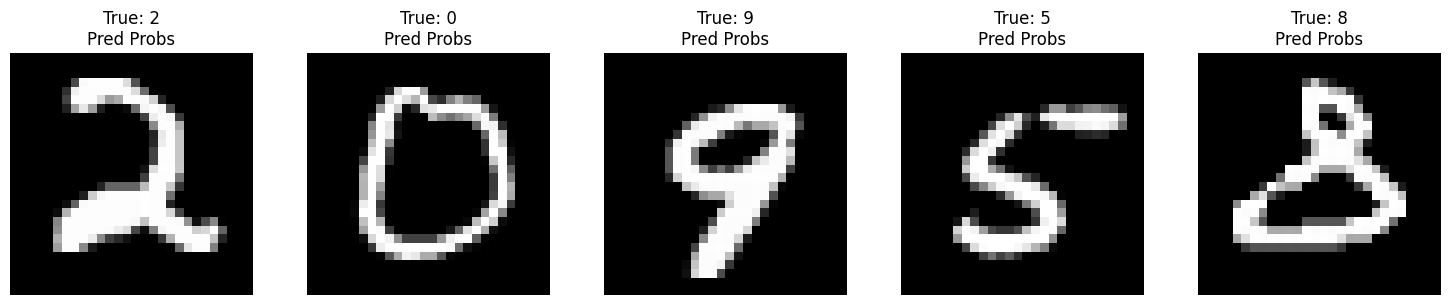

In [ ]:
plt.figure(figsize=(15, 3))
#enumerate is used to get both the index (i) and the value (idx) from sample_indices.
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPred Probs')
    plt.axis('off')

    # Print top 3 class probabilities
    top_3_classes = np.argsort(sample_probs[i])[-3:][::-1]
    for cls in top_3_classes:
        print(f"Class {cls}: {sample_probs[i][cls]*100:.2f}%")
    print("\n")

plt.tight_layout()
plt.show()